In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt=pd.read_csv("airline_sentiment_analysis.csv")

In [3]:
dt.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [4]:
dt.isnull().sum()

Unnamed: 0           0
airline_sentiment    0
text                 0
dtype: int64

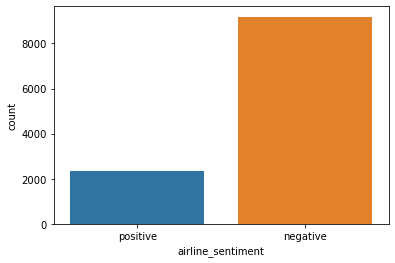

In [5]:
sns.countplot(dt["airline_sentiment"])

In [6]:
dt=dt.drop(["Unnamed: 0"],axis=1)

In [7]:
# Cleaning the texts
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [8]:
lm=WordNetLemmatizer()

In [9]:
dt["airline_sentiment"]=pd.get_dummies(dt["airline_sentiment"])

In [10]:
dt.head()

,airline_sentiment,text
0,0,@VirginAmerica plus you've added commercials t...
1,1,@VirginAmerica it's really aggressive to blast...
2,1,@VirginAmerica and it's a really big bad thing...
3,1,@VirginAmerica seriously would pay $30 a fligh...
4,0,"@VirginAmerica yes, nearly every time I fly VX..."


In [11]:
dt.shape

(11541, 2)

In [12]:
 #removing words which starts with @ symbols
dt['text'] = dt['text'].map(lambda x:re.sub('@\w*','',str(x)))

In [13]:
dt.head()

,airline_sentiment,text
0,0,plus you've added commercials to the experien...
1,1,"it's really aggressive to blast obnoxious ""en..."
2,1,and it's a really big bad thing about it
3,1,seriously would pay $30 a flight for seats th...
4,0,"yes, nearly every time I fly VX this “ear wor..."


In [14]:
#Text Preprocessing
corpus=[]
for i in range(0,11541):
    
    review = re.sub('[^A-Za-z]', ' ',dt['text'][i])
    
    review = review.lower()
    
    review = review.split()
    
    review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    
    review = ' '.join(review)
    
    corpus.append(review)

In [15]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf.fit_transform(corpus).toarray()

#### saving TFIDF

In [16]:
pickle.dump(tfidf, open("transform2.pkl", 'wb'))

In [17]:
#dependent variable
y=dt["airline_sentiment"]

#### splitting data into train and test

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =96)

#### Applying  Random forest  Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

In [20]:
#training the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred_rf = rf.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score
cm_rf= confusion_matrix(y_test, y_pred_rf)
accuracy_score_rf=accuracy_score(y_test, y_pred_rf)
recall_score_rf=recall_score(y_test, y_pred_rf)
precision_score_rf=precision_score(y_test, y_pred_rf)

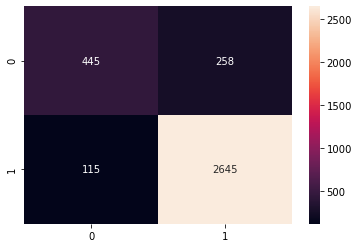

In [24]:
sns.heatmap(cm_rf,annot=True,fmt="d")

In [23]:
print("accuracy= {},\n recall_score= {},\n precision={}".format(accuracy_score_rf*100,recall_score_rf*100,precision_score_rf*100))

accuracy= 89.22899220329195,
 recall_score= 95.83333333333334,
 precision=91.11264209438512


#### saving model

In [25]:
pickle.dump(rf, open("nlp_rf1_model.pkl", 'wb'))